In [1]:
%load_ext autoreload
%autoreload 2
import os
import torch as t
from utils.config import opt
from model import FasterRCNNVGG16
from trainer import FasterRCNNTrainer
from data.util import  read_image
from utils.vis_tool import vis_bbox
from utils import array_tool as at
%matplotlib inline

In [2]:
img = read_image('/home/cs/work/my_voc_dataset/JPEGImages/000001.jpg')
img = t.from_numpy(img)[None]

In [3]:
opt.caffe_pretrain=True
faster_rcnn = FasterRCNNVGG16(n_fg_class=1)
trainer = FasterRCNNTrainer(faster_rcnn).cuda()
trainer.load('/home/cs/work/simple-faster-rcnn-pytorch/checkpoints/fasterrcnn_03232047_0.8876419553002197')

You'll need to download pretrained model from [google dirve](https://drive.google.com/open?id=1cQ27LIn-Rig4-Uayzy_gH5-cW-NRGVzY) 
# 1. model converted from chainer

/usr/local/lib/python3.5/dist-packages/chainer/cuda.py:84: UserWarning: cuDNN is not enabled.
Please reinstall CuPy after you install cudnn
(see https://docs-cupy.chainer.org/en/stable/install.html#install-cupy-with-cudnn-and-nccl).
  'cuDNN is not enabled.\n'


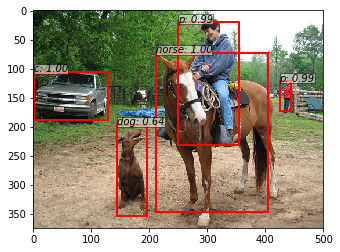

In [4]:
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))
# it failed to find the dog, but if you set threshold from 0.7 to 0.6, you'll find it

# 2. model trained with torchvision pretrained model

# 3. model trained with caffe pretrained model